# Plotting with Matplotlib in Python

In this guide (not a tutorial), we're going to talk about one of the most important (but trickest) parts of the Python universe: plotting. We've spent a lot of time using Python as a language to explore data, and even produced plenty of plots — but these are primarily tools we use to interrogate the data as we work with them. When it comes time to write a scientific paper, the plots need to be very specific, and nicely made. Instead of trusting matplotlib's default plotting tools to create a plot, we are going to define every small detail of the plot from scratch. 

Let's get going!

In [14]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors  
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 
#This just makes the plots appear in the notebook; on your own you wouldn't need this

In the past, we used to plot things by the simple plt.plot command. for example, let's set up some random data and plot it:

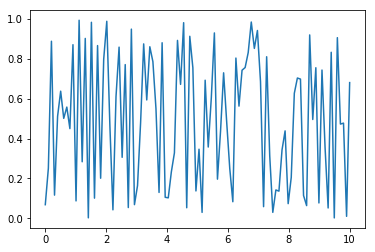

In [15]:
x = np.linspace(0,10,100)
y = np.random.random(size=len(x))
plt.plot(x,y)

Our data isn't inherently "connected" like a time series, so let's use points instead:

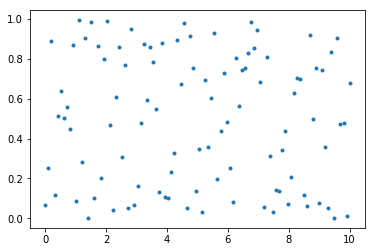

In [16]:
plt.plot(x,y,'.')

When you use plt.plot() like this, there's actually a lot going on under the hood. In order to dynamically change the look and feel of our plot, we are going to need to build it ourselves. I won't pretend I'm the full expert, or that this description will be 'correct' of how mpl works at a base level, but that isn't needed to make great plots. Consider this description a mental model for building plots that work.

## Figures and Axes
When we ran plot() above, matplotlib actually generated two distinct entities needed: a figure, and a set of axes. Think of the axes as the thing actually being plotted on (the lines we see there), and the figure as the "canvas" behind it in the background that the axes sit on. If you wanted to adjust, say, the plot limits, that would be an axes action, if you wanted to change the width and height of the overall final pdf in inches, that would be a figure command. 

### Subplots
Subplots are a way of putting multiple axes objects within one figure object, allowing you to make multipanel plots. We're not there yet, but I mention this now because the single plot can be considered a "subplot" call with only one set of axes. If you define your plots this way, it becomes easy to learn how to do multiple plots later. 

The way we get started then, is to set up figure and axes objects using the plt.subplot command:

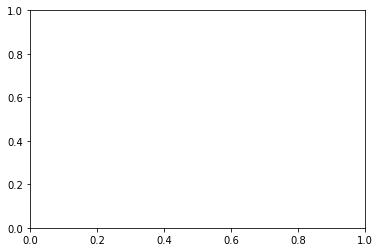

In [17]:
fig, ax = plt.subplots()

this has created an empty plot with a set of axes on a blank canvas. This happens when we feed no arguments to subplot — but just to hint at what comes later, I could do this:

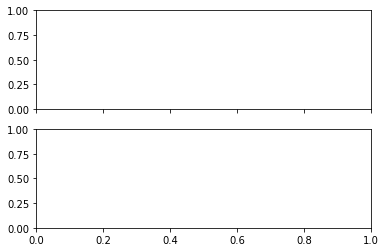

In [18]:
fig2,ax2 = plt.subplots(2,sharex=True)

And easily create two subplots which are stacked vertically, and share axes labels. More on that in a bit. Let's return to our single plot above. 

We now want to get the data from above onto our plot. This has to do with the axes, so I'm going to call:

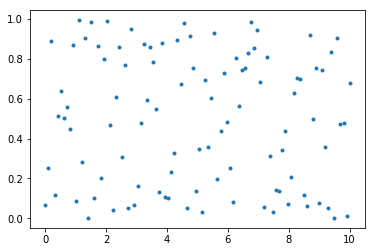

In [21]:
fig, ax = plt.subplots()
ax.plot(x,y,'.')
plt.show();

Ok, so we're back where we started. Why is this better? 

Well, I now have access to the figure and axes objects that define this plot (notice plt.plot does not return figure/axes objects). What can I do with that? 

Firstly, I can do everything I could do before with plt.plot() — but annoyingly, with different commands. So let's do a few of those first. 

After running a normal plot() command, you might have learned you can use plt.xlim() and plt.ylim() to set the limits on the plot. Here, we are going to use a slightly different method:

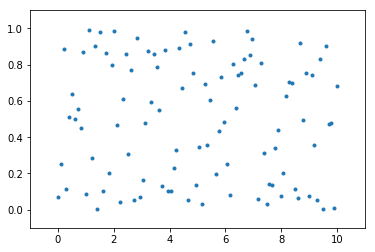

In [24]:
fig, ax = plt.subplots()
ax.plot(x,y,'.')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.1)
plt.show();

If I have a legend, that goes on the axes object too:

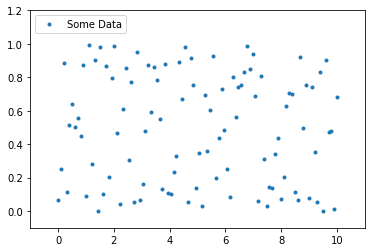

In [26]:
fig, ax = plt.subplots()
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
plt.show();

And, finally, where we used to use plt.xlabel and plt.ylabel, we will now do: 

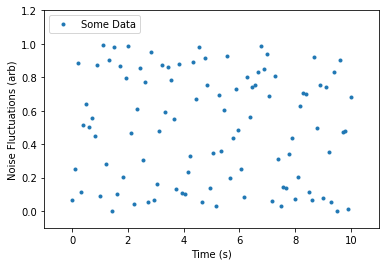

In [35]:
fig, ax = plt.subplots()
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
plt.show();

It's a decent rule of thumb that for things you've learned with regular plots, changing to set_blah() gets you the ax version, but if not, then it's easy to just root around the matplotlib documentation online to find it. 

Let's get a little fancier with our plot. My advisor loves square plots, so I'm going to use the fig object to make it square:

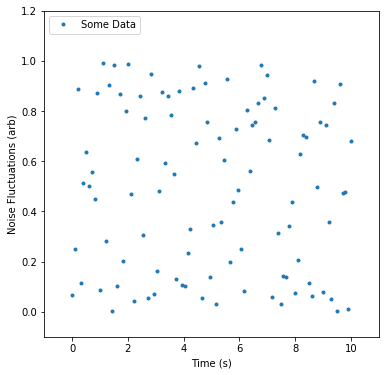

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
plt.show();

## Messing with Ticks

The next thing on our list might be adjusting how the ticks look. Scientifically, outward pointing ticks reduces the chance of overlapping with data, butttt I like inward ticks and for now and for the sake of examples, let's change our ticks to face in, adjust their lengs, add minor ticks, and put all of them on all four "walls" of the plot, just to show how those commands work:

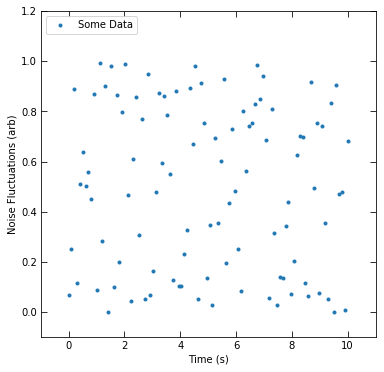

In [37]:
fig, ax = plt.subplots(figsize=(6,6))
# old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
# new stuff 
ax.tick_params(axis='both',direction='in',length=6,top=True,right=True)
plt.show();

So, ax.tick_params() has lots of things to mess with (check out the documentation online), but what I did was specify that I wanted this particular call to address both x and y (you could pick just one), that I want the direction of the ticks to be "in", their length to be 6, and for them to appear on the top and right edges of the plot (left and bottom are on by default). 

Next I want to add minor ticks. For this, I need to "locate" them, and then "format them" onto the plot. That is done as follows:

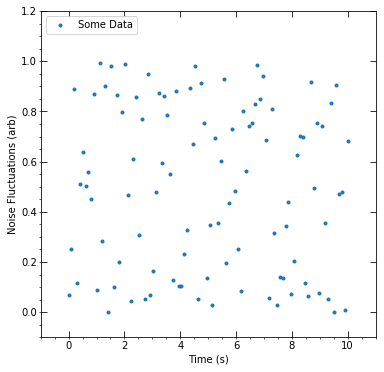

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
# old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
# new stuff 
ax.tick_params(axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
plt.show();

What I've done is use the MultipleLocator class, which allows you to set intervals of ticks, to choose appropriate minor tick intervals for each axis and then set them to the plot. 

Now we need to make them point in, like the major ticks, and get them onto the other two sides:

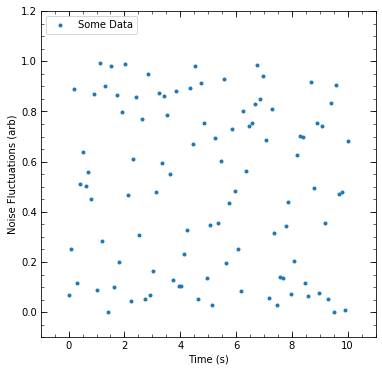

In [39]:
fig, ax = plt.subplots(figsize=(6,6))
# old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
# new stuff 
ax.tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
plt.show();

Notice that I use ax.tick_params() now twice, once to adjust the minor ticks and once to adjust the major ticks. The reason 2 calls were needed is I now specify using the "which" keyword that I'm only affecting the major ticks with the first and the minor with the second. If I wasn't setting the length, the two calls would look the same, and I could condense it down to one call, with "which" set to "both". 

## Adjusting fonts and fontsizes

One of the major issues with matplotlib's defaults is that, when compared with how plots are inserted into often 2-column papers, the fontsizes are just too small to work with. 
We can set the fontsize globally, or adjust it for a lot of the individual components. To set it globally, we'd use:

In [43]:
plt.rc("font", size=16,family='serif')

I've also switched our font family over to serif - that's just a personal preference. Now if we replot:

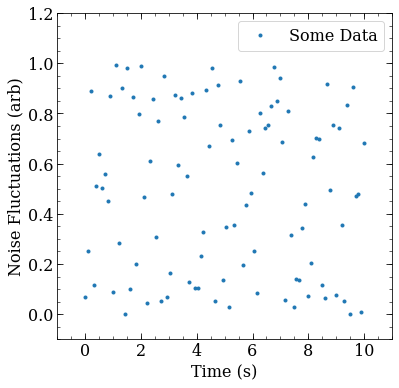

In [44]:
fig, ax = plt.subplots(figsize=(6,6))
# old stuff
ax.plot(x,y,'.',label='Some Data')
ax.legend(loc=1)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Noise Fluctuations (arb)')
ax.set_xlim(-1,11)
ax.set_ylim(-0.1,1.2)
# new stuff 
ax.tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
plt.show();

That is now much easier to read. You can also adjust the exact fonts being used in a similar manner. 

## Multiple subplots

Let's say we wanted to put two plots side by side, both of which were plotting noise fluctuations from 0 to 1 (like two trials of the same experiment. We could do that using subplots, as hinted at above. 

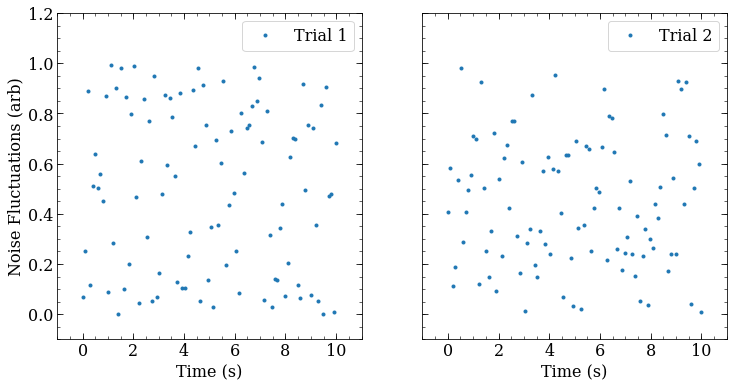

In [48]:
new_y = np.random.random(size=len(x))
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))
# old stuff
ax[0].plot(x,y,'.',label='Trial 1')
ax[0].legend(loc=1)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Noise Fluctuations (arb)')
ax[0].set_xlim(-1,11)
ax[0].set_ylim(-0.1,1.2)
# new stuff 
ax[0].tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax[0].xaxis.set_minor_locator(XminorLocator)
ax[0].yaxis.set_minor_locator(YminorLocator)
ax[0].tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

ax[1].plot(x,new_y,'.',label='Trial 2')
ax[1].legend(loc=1)
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim(-1,11)
ax[1].set_ylim(-0.1,1.2)
# new stuff 
ax[1].tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax[1].xaxis.set_minor_locator(XminorLocator)
ax[1].yaxis.set_minor_locator(YminorLocator)
ax[1].tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
plt.show();

Let's take a look at what I did: 

First, note that when you call subplots in a way that generates more than 1, ax becomes a list of axes objects, each of which can be indexed to in order to be adjusted. I thus, since the two have the same plotting settings, replicated them indexed at 1 – but most of the time, your plots will have different settings going onto each (if not, ask yourself why they aren't simply displayed on the same plot). I did remove the y_label call to the second plot, since it is sharing with the first. And for fun I gave more "meaningful" labels.

As it stands, the two plots are separated by some default amount of whitespace. We can adjust that to bring them closer together:

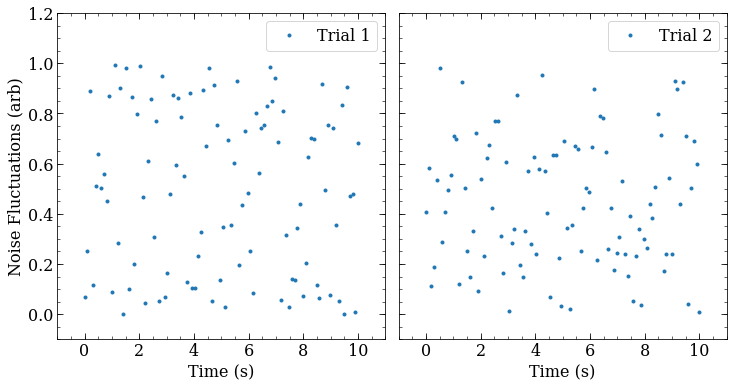

In [53]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))
# old stuff
ax[0].plot(x,y,'.',label='Trial 1')
ax[0].legend(loc=1)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Noise Fluctuations (arb)')
ax[0].set_xlim(-1,11)
ax[0].set_ylim(-0.1,1.2)
ax[0].tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax[0].xaxis.set_minor_locator(XminorLocator)
ax[0].yaxis.set_minor_locator(YminorLocator)
ax[0].tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
ax[1].plot(x,new_y,'.',label='Trial 2')
ax[1].legend(loc=1)
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim(-1,11)
ax[1].set_ylim(-0.1,1.2)
ax[1].tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax[1].xaxis.set_minor_locator(XminorLocator)
ax[1].yaxis.set_minor_locator(YminorLocator)
ax[1].tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

# New stuff
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.04, hspace=None)

plt.show();

For now I only adjusted the "wspace" parameter, which controls the horizontal spacing between subplots in your figure. If they were verticall stacked, I would have used the hspace instead. Left, Right, Top, and Bottom adjust how far away you are from the edges of the overall figure.

Here, stretching to meet those edges would mess up our aspect ratios, but we can try out tight_layout to try to fix it:

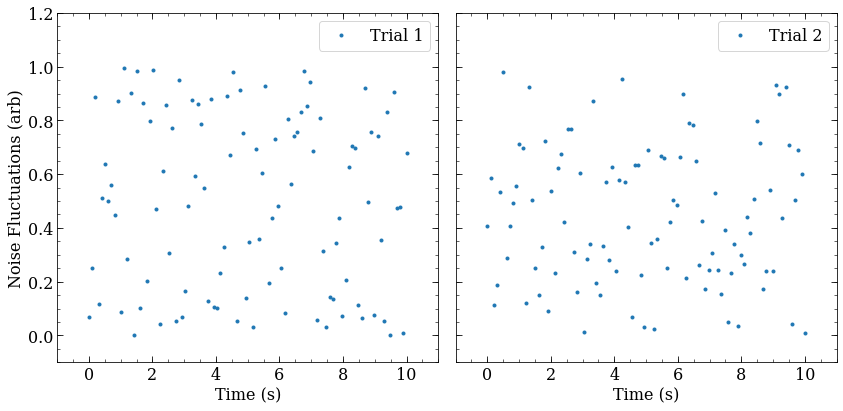

In [54]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6))
# old stuff
ax[0].plot(x,y,'.',label='Trial 1')
ax[0].legend(loc=1)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Noise Fluctuations (arb)')
ax[0].set_xlim(-1,11)
ax[0].set_ylim(-0.1,1.2)
ax[0].tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax[0].xaxis.set_minor_locator(XminorLocator)
ax[0].yaxis.set_minor_locator(YminorLocator)
ax[0].tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)
ax[1].plot(x,new_y,'.',label='Trial 2')
ax[1].legend(loc=1)
ax[1].set_xlabel('Time (s)')
ax[1].set_xlim(-1,11)
ax[1].set_ylim(-0.1,1.2)
ax[1].tick_params(which='major',axis='both',direction='in',length=6,top=True,right=True)
XminorLocator = MultipleLocator(0.5)
YminorLocator = MultipleLocator(0.05)
ax[1].xaxis.set_minor_locator(XminorLocator)
ax[1].yaxis.set_minor_locator(YminorLocator)
ax[1].tick_params(which='minor',axis='both',direction='in',length=3,top=True,right=True)

# New stuff
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.04, hspace=None)
plt.tight_layout()
plt.show();

It's hard to tell in the notebook, but when you output your PDF or PNG plots (usually via plt.savefig(), you'll notice the whitespacing. This starts to matter when you're going to insert the plot into a scientific publication. 

At this point, it becomes difficult to know what to cover, since every plot is different — as such, learning how to search the matplotlib examples and documentation (as well as stack overflow and lots of other websites) becomes very important. As such, I've decided to just go through some of the plotting commands that I run into or use most frequently. 

## Alpha, zorder, and fill_between

Here's a quick example that makes use of the "alpha" (transparency) parameter, the "zorder" (order of plotting things on top of one another), and "fill_between" option, which lets you shade regions between two lines on a plot. 

We'll start by inventing a dataset (so that this notebook doesn't need any extra data files).

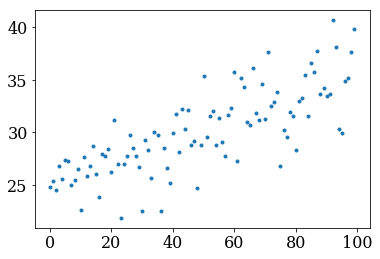

In [59]:
noise = np.random.normal(1,0.08,100) #mean 1, spread 0.5, 100 elements
data_x = np.arange(0,100)
data_y = np.linspace(25,36,100)*noise
plt.plot(data_x,data_y,'.');

Notice that for convience of just viewing our data, I've reverted to the easiest plotting version. It's actually kind of incredible, looking at the end of the previous example, how many lines of code go into making one plot look just right. Sometimes the code to make my plot is longer than the code to generate the data going **into** the plot. 

What we appar to have here is a dataset that increases from around 25 to around 40, with some scatter. 

Let's do what anyone would do at first glance, and try to fit it with a linear polynomial:

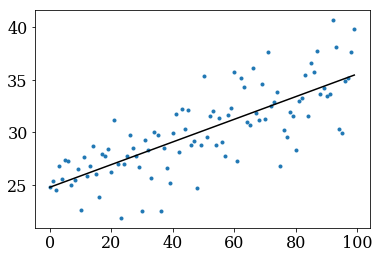

In [64]:
fit = np.polyfit(data_x,data_y,1,cov=True) #linear
best_fit_y = fit[0][0]*data_x + fit[0][1] #first index takes fit params, second specifies
plt.plot(data_x,data_y,'.')
plt.plot(data_x,best_fit_y,'k');

Is this a good fit to the data?

Here, actually, we could easily descend into a Bayesian vs Frequentist debate. I'm not going to do that. What I am gonna do is show how we might plot some "uncertainty" over this fit line. 

Polyfit gives you a covariance matrix of parameter uncertainties, which we can access like this:

In [65]:
covariance_matrix = fit[1]
covariance_matrix

array([[ 8.20165555e-05, -4.05981950e-03],
       [-4.05981950e-03,  2.69301360e-01]])

The uncertainty on the slope and intercept, respectively, are given by the diagonals:


In [68]:
unc = np.sqrt(np.diag(covariance_matrix))
print('Slope: {} | Intercept: {}'.format(fit[0][0],fit[0][1]))
print('Slope unc: {} | Intercept unc: {}'.format(unc[0],unc[1]))

Slope: 0.107891349514 | Intercept: 24.7740511909
Slope unc: 0.00905629921931 | Intercept unc: 0.518942540314


So what I can do, for example, is overplot (faintly) a bunch of the other possible lines within the error of this fit:

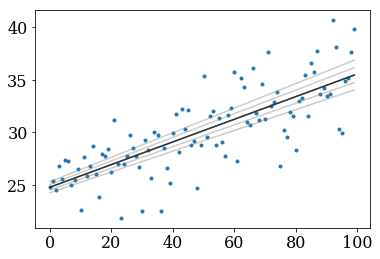

In [70]:
plt.plot(data_x,data_y,'.')
plt.plot(data_x,best_fit_y,'k')
slope = fit[0][0]
intercept = fit[0][1]
slopes = np.linspace(slope-unc[0],slope+unc[0],5) #take 20 slopes in unc range
intercepts = np.linspace(intercept-unc[1],intercept+unc[1],5) # take 20 intercepts in unc range
for i in range(len(slopes)):
    plt.plot(data_x*slopes[i]+intercepts[i],alpha=0.4,color='gray');

We could actually give the impression of a shaded region quite easily just by upping the number of lines:

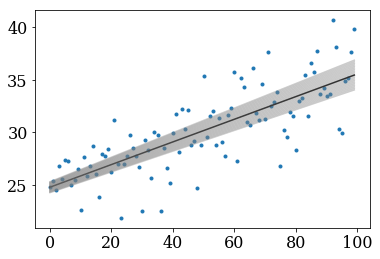

In [71]:
plt.plot(data_x,data_y,'.')
plt.plot(data_x,best_fit_y,'k')
slope = fit[0][0]
intercept = fit[0][1]
slopes = np.linspace(slope-unc[0],slope+unc[0],20) #take 20 slopes in unc range
intercepts = np.linspace(intercept-unc[1],intercept+unc[1],20) # take 20 intercepts in unc range
for i in range(len(slopes)):
    plt.plot(data_x*slopes[i]+intercepts[i],alpha=0.4,color='gray');

What's a more formal (and memory saving) way to do this?

We can calculate at each x-value the maximum and minimum allowed y value that is produced by lines within our errors we calculated above. We can easily set up a multidimensional array:

In [78]:
line_array = np.empty([20,100])
for i in range(len(slopes)):
    line_array[i] = data_x*slopes[i]+intercepts[i]
line_array

array([[24.25510865, 24.3539437 , 24.45277875, ..., 33.84210853,
        33.94094358, 34.03977863],
       [24.30973418, 24.40952253, 24.50931087, ..., 33.98920364,
        34.08899199, 34.18878033],
       [24.36435971, 24.46510135, 24.56584299, ..., 34.13629875,
        34.23704039, 34.33778203],
       ...,
       [25.18374267, 25.29878373, 25.41382479, ..., 36.34272543,
        36.45776649, 36.57280755],
       [25.2383682 , 25.35436255, 25.47035691, ..., 36.48982055,
        36.6058149 , 36.72180925],
       [25.29299373, 25.40994138, 25.52688903, ..., 36.63691566,
        36.75386331, 36.87081096]])

now, all we have to do is take the min and max at each x-value, looking down the vertical axis of this array:

In [81]:
lower_edge = np.min(line_array,axis=0)
upper_edge = np.max(line_array,axis=0)

which means we can now plot:

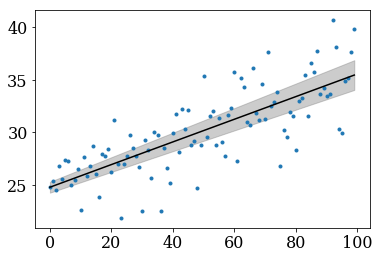

In [82]:
plt.plot(data_x,data_y,'.')
plt.plot(data_x,best_fit_y,'k')
slope = fit[0][0]
intercept = fit[0][1]
slopes = np.linspace(slope-unc[0],slope+unc[0],20) #take 20 slopes in unc range
intercepts = np.linspace(intercept-unc[1],intercept+unc[1],20)
plt.fill_between(data_x,lower_edge,upper_edge,color='gray',alpha=0.4)

It looks the same (which is a good thing, right?) and fill between actually colors in the space, rather than using individual lines, which if you are plotting many figures with many lines can reduce your filesize considerably. Let's make this plot look a little nicer:

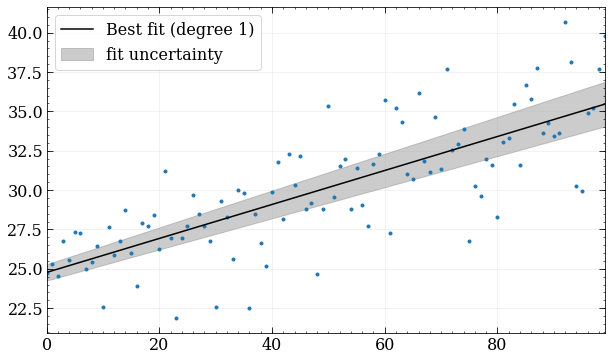

In [100]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data_x,data_y,'.')
ax.plot(data_x,best_fit_y,'k',label='Best fit (degree 1)')
slope = fit[0][0]
intercept = fit[0][1]
slopes = np.linspace(slope-unc[0],slope+unc[0],20) #take 20 slopes in unc range
intercepts = np.linspace(intercept-unc[1],intercept+unc[1],20)
ax.fill_between(data_x,lower_edge,upper_edge,color='gray',alpha=0.4,label='fit uncertainty')
ax.legend(loc=2) #starts upper right, moves counter clockwise
ax.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax.tick_params(which='major',length=6)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.set_xlim(0,99)
plt.grid(alpha=0.2);

If it wasn't implied, the "alpha" parameter moves between 0 and 1, 1 being pure color and 0 being fully transparent. 

The "z-order" of how things are plotted is determined, nominally, by the order you plot (subsequent lines of code get plotted over existing ones). If you want to take something you plotted earlier and move it to the top, you can add the optional "zorder" keyword to select a higher layer. 

Just an aside... scientifically speaking, the covariance matrix here clearly hasn't caught all of our uncertainty. Here, we know how the data was generated, but in general, your error is at least as large as the scatter in your data, assuming no errorbars — on the other hand, if these points have large errorbars, this could be fully consistent. 

Just to give an example of errorbar plotting, let's say that the error on each point (symmetric in y, though it doesn't need to be), is 4 of whatever y units we are using. That would be:

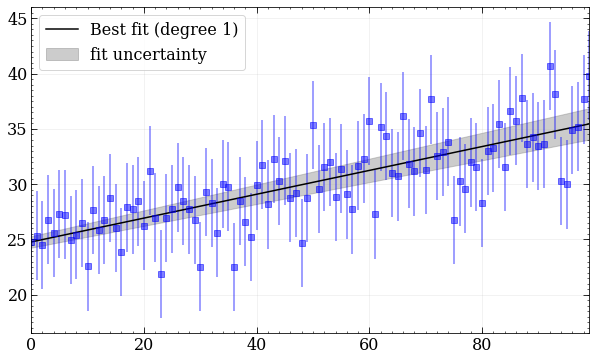

In [102]:
yerrors = np.ones(len(data_x))*4.0
fig, ax = plt.subplots(figsize=(10,6))
#######################################
ax.errorbar(data_x,data_y,yerr=yerrors,fmt='s',color='b',alpha=0.5)
#######################################
ax.plot(data_x,best_fit_y,'k',label='Best fit (degree 1)')
slope = fit[0][0]
intercept = fit[0][1]
slopes = np.linspace(slope-unc[0],slope+unc[0],20) #take 20 slopes in unc range
intercepts = np.linspace(intercept-unc[1],intercept+unc[1],20)
ax.fill_between(data_x,lower_edge,upper_edge,color='gray',alpha=0.4,label='fit uncertainty')
ax.legend(loc=2) #starts upper right, moves counter clockwise
ax.tick_params(which='both',axis='both',direction='in',top=True,right=True)
ax.tick_params(which='major',length=6)
XminorLocator = MultipleLocator(2)
YminorLocator = MultipleLocator(0.5)
ax.xaxis.set_minor_locator(XminorLocator)
ax.yaxis.set_minor_locator(YminorLocator)
ax.set_xlim(0,99)
plt.grid(alpha=0.2);

All of a sudden, the fit doesn't look so awful! The only note I have for the change is that with ax.errorbar(), you can't shortcut the symbol type - you use fmt="s" where in quotes is the symbol marker (s for square, o for circle, . for dots ^ for triangles, etc.)

Hopefully, this has covered some of the basics of making your plots look nice. As mentioned, there's lots of different types of plots and ways to do it, but I may make more guides as I go!